# 0. Khai báo các thư viện cần dùng

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# 1. Đọc dữ liệu từ file CSV

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31011319/OnlineRetail.csv", encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 2. Chọn mục tiêu Vẽ biểu đồ đường thể hiện xu hướng thay đổi số lượng đơn hàng theo thời gian trong năm 2011

In [5]:
# chuyển đổi định dạng ngày tháng
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, infer_datetime_format=True)

In [6]:
df1 = df.loc[:,["InvoiceNo", "InvoiceDate"]]
df1.head()

,InvoiceNo,InvoiceDate
0,536365,2010-12-01 08:26:00
1,536365,2010-12-01 08:26:00
2,536365,2010-12-01 08:26:00
3,536365,2010-12-01 08:26:00
4,536365,2010-12-01 08:26:00


In [7]:
df1 = df1.drop_duplicates(subset = "InvoiceNo", keep = "last")
df1.reset_index(drop = True)
df1["Year"] = df1.InvoiceDate.dt.year
df1["Date"] = df1.InvoiceDate.dt.date
df1["Month"] = df1.InvoiceDate.dt.month

In [8]:
df1.head()

,InvoiceNo,InvoiceDate,Year,Date,Month
6,536365,2010-12-01 08:26:00,2010,2010-12-01,12
8,536366,2010-12-01 08:28:00,2010,2010-12-01,12
20,536367,2010-12-01 08:34:00,2010,2010-12-01,12
24,536368,2010-12-01 08:34:00,2010,2010-12-01,12
25,536369,2010-12-01 08:35:00,2010,2010-12-01,12


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25900 entries, 6 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    25900 non-null  object        
 1   InvoiceDate  25900 non-null  datetime64[ns]
 2   Year         25900 non-null  int64         
 3   Date         25900 non-null  object        
 4   Month        25900 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.2+ MB


In [10]:
df1 = df1[df1.Year == 2011]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23875 entries, 42497 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    23875 non-null  object        
 1   InvoiceDate  23875 non-null  datetime64[ns]
 2   Year         23875 non-null  int64         
 3   Date         23875 non-null  object        
 4   Month        23875 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.1+ MB


In [12]:
df2 = df1.groupby(df1.Date).count()

In [13]:
df2.sort_index(ascending = True, inplace = True)

In [14]:
df2

,InvoiceNo,InvoiceDate,Year,Month
Date,,,,
2011-01-04,57,57,57,57
2011-01-05,76,76,76,76
2011-01-06,78,78,78,78
2011-01-07,58,58,58,58
2011-01-09,51,51,51,51
...,...,...,...,...
2011-12-05,151,151,151,151
2011-12-06,149,149,149,149
2011-12-07,138,138,138,138


In [15]:
# Giá trị trục x
x = df2.index.get_level_values(0)

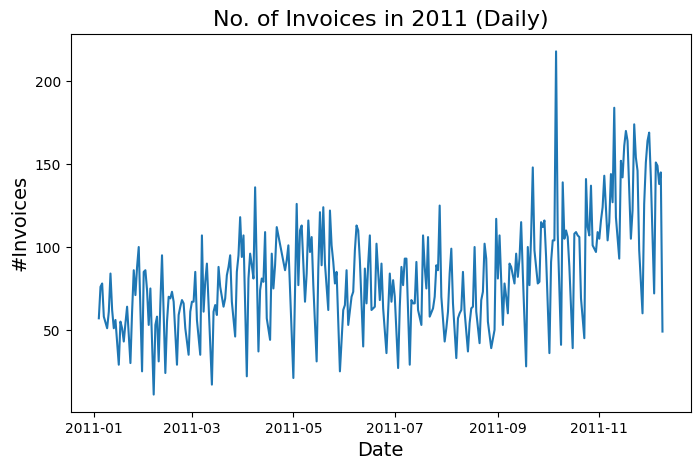

In [16]:
# Vẽ biểu đồ cột
plt.figure(figsize = (8,5), dpi = 100)
plt.plot(x, df2.InvoiceDate)
plt.title("No. of Invoices in 2011 (Daily)", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("#Invoices", fontsize = 14)
plt.show()

Nhận xét:
- Số lượng đơn hàng ngày có sự thay đổi mạnh.
- Giữa tháng 10 và 11 có 1 ngày có số đơn tăng đột biến.
- Tuy nhiên, biểu đồ này không thể hiện được việc thiếu dữ liệu trong 1 số ngày (do cách nhóm dữ liệu)

# 3. Vẽ biểu đồ cột so sánh số lượng đơn hàng trong các tháng của năm 2011

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23875 entries, 42497 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    23875 non-null  object        
 1   InvoiceDate  23875 non-null  datetime64[ns]
 2   Year         23875 non-null  int64         
 3   Date         23875 non-null  object        
 4   Month        23875 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.1+ MB


In [18]:
df1.head()

,InvoiceNo,InvoiceDate,Year,Date,Month
42497,539993,2011-01-04 10:00:00,2011,2011-01-04,1
42498,539994,2011-01-04 10:09:00,2011,2011-01-04,1
42499,539995,2011-01-04 10:12:00,2011,2011-01-04,1
42500,539996,2011-01-04 10:12:00,2011,2011-01-04,1
42501,539997,2011-01-04 10:15:00,2011,2011-01-04,1


In [19]:
df3 = df1.groupby(by = df1.Month).count()

In [20]:
df3

,InvoiceNo,InvoiceDate,Year,Date
Month,,,,
1,1476,1476,1476,1476
2,1393,1393,1393,1393
3,1983,1983,1983,1983
4,1744,1744,1744,1744
5,2162,2162,2162,2162
6,2012,2012,2012,2012
7,1927,1927,1927,1927
8,1737,1737,1737,1737
9,2327,2327,2327,2327


In [21]:
# Toạ độ x
x = df3.index.get_level_values(0)

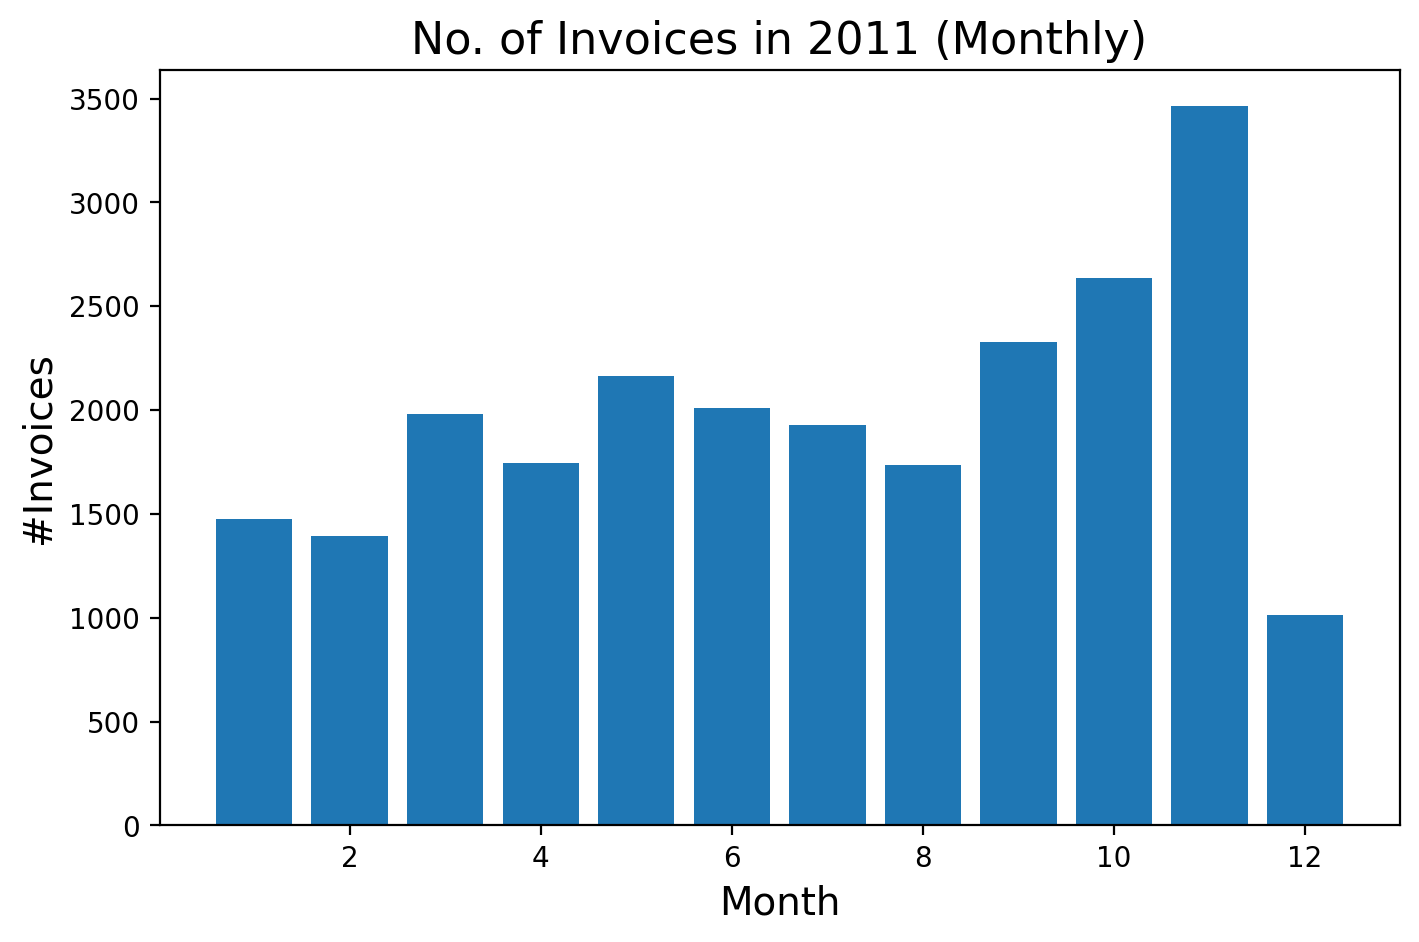

In [22]:
# Vẽ biểu đồ hình cột
plt.figure(figsize = (8,5), dpi = 200)
plt.bar(x, df3.InvoiceNo)
plt.title("No. of Invoices in 2011 (Monthly)", fontsize = 16)
plt.xlabel("Month", fontsize = 14)
plt.ylabel("#Invoices", fontsize = 14)
plt.show()

Nhận xét:

- 3 tháng 9, 10, 11 có số lượng đơn hàng tăng đáng kể, trong đó tháng 11 có số đơn hàng cao nhất.
- Tháng 12 có tổng số lượng đơn hàng thấp nhất.